In [293]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [294]:
PATHS = [
    '/home/shubham/MAIN/Academics/CS-669/assignment_5/linearly_seperable_data',
    '/home/shubham/MAIN/Academics/CS-669/assignment_5/non_linearly_seperable data'
]

In [295]:
def get_data(file_path, label):
    with open(file_path) as f:
        features = np.array(list(map(lambda x : list(map(float, x.strip().split())),f.readlines())))
        labels = np.reshape(np.array(features.shape[0]*[label]), [-1, 1])
        features = np.append(features, labels, axis=1)
    return features



In [296]:
data1 = np.append(get_data(PATHS[0] + '/Class1.txt', -1), get_data(PATHS[0] + '/Class2.txt', 1),0)
data2 = np.append(get_data(PATHS[1] + '/Class1.txt', -1), get_data(PATHS[1] + '/Class2.txt', 1),0)

In [297]:
print(data1)
print(data2)

[[ 2.93127  1.80248 -1.     ]
 [ 5.17638  2.25363 -1.     ]
 [-1.91244 -1.15638 -1.     ]
 ...
 [-5.28276  6.10008  1.     ]
 [-3.84783 11.8236   1.     ]
 [-6.14651  4.48402  1.     ]]
[[ 4.52188   3.49331  -1.      ]
 [10.6017    5.01284  -1.      ]
 [-8.59493   0.884666 -1.      ]
 ...
 [26.2501    3.75148   1.      ]
 [28.9105   17.6213    1.      ]
 [28.8671   14.3852    1.      ]]


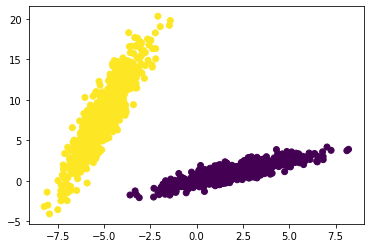

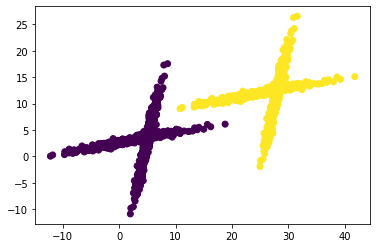

In [298]:
def plot_data(X):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=X[:,2])

plot_data(data1)
plot_data(data2)

In [306]:
unit_step = lambda x: -1 if x < 0 else 1


class Perceptron:

    def __init__(self, intializer=None):
        self.intializer = intializer if intializer else np.zeros
    
    def fit(self, X, Y, learning_rate = 0.5, iterations=20):
        X = np.append(X, np.ones(len(X)).reshape(-1, 1), axis=1)
        self.feature_shape = X.shape[1:]
        self.weights = self.intializer(self.feature_shape)
        self.min = min(X[:, 0])
        self.max = max(X[:, 0])
        for iter in range(iterations):
            # print(f'iteration {iter+1}/{iterations}')
            wrong = []
            y = np.dot(X, self.weights)
            for i in range(len(Y)):
                if y[i]*Y[i] <= 0:
                    wrong.append(i)
            if len(wrong) == 0:
                return
            ind = np.random.choice(wrong)
            x = X[ind]
            # error = y[ind] - Y[i]
            error = unit_step(y[ind])
            self.weights -= learning_rate*error*x

    def predict(self, input_vectors):
        input_vectors = np.append(input_vectors, np.ones(len(input_vectors)).reshape(-1, 1), axis=1)
        return [unit_step(i) for i in np.dot(input_vectors, self.weights)]

    def plot(self):
        print(self.weights)
        y1 = (-self.weights[0]*self.min-self.weights[2] )/ self.weights[1]
        y2 = (-self.weights[0]*self.max-self.weights[2] )/ self.weights[1]
        plt.plot([self.min, self.max], [y1, y2], color='black')

    def get_eff(self, input_vectors, labels):
        y_pred = self.predict(input_vectors)
        acc = 0
        for true, pred in zip(labels, y_pred):
            if true==pred:
                acc += 1
        return acc/len(labels)


[-2.565433    2.54689455 -6.        ]
1.0


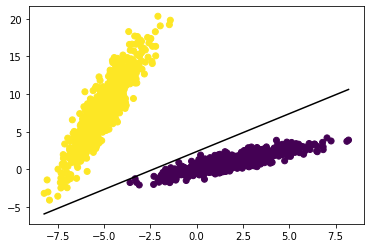

In [308]:
x_train, x_test, y_train, y_test = tts(data1[:,:2], data1[:,-1], random_state=42, test_size=0.3)
model = Perceptron()
model.fit(x_train, y_train, learning_rate = 0.5, iterations=500)
plot_data(data1)
model.plot()
print(model.get_eff(x_test, y_test))

[ 0.37268979  0.1358547  -3.86      ]
0.965


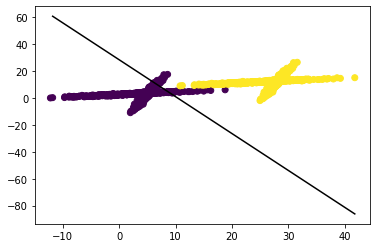

In [310]:
x_train, x_test, y_train, y_test = tts(data2[:,:2], data2[:,-1], random_state=42, test_size=0.3)
model = Perceptron()
model.fit(x_train, y_train, learning_rate = 0.01, iterations=1000)
plot_data(data2)
model.plot()
print(model.get_eff(x_test, y_test))